In [72]:
#importing libraries, installing category encoders:
#also loading relevant data frames
import numpy as np
import pandas as pd
import seaborn as sns

#df = pd.read_csv('/content/movies_metadata.csv', low_memory=False)
#df.loc[df['release_date'] == 'TV Movie 2019', 'release_date'] = '2019'
##df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True, errors='coerce')
#df.drop(columns='adult', inplace=True)
#df['year'] = df['release_date'].dt.year
#df['year'] = df['year'].astype(float)
#df_fresh = pd.read_csv('/content/IMDb movies.csv', low_memory=False)
#df_fresh.loc[df_fresh['year'] == 'TV Movie 2019', 'year'] = 2019
#df_fresh['year'] = df_fresh['year'].astype(float)
#a = df.loc[df['revenue'].isnull()].index
#df.drop(labels=a, inplace=True)
#df.reset_index(inplace=True)
#df.drop_duplicates(inplace=True)

In [73]:
!pip install category_encoders

In [74]:

#Decreasing number of NAN inputs for revenue referencing another IMDB dataset

#alpha = df.loc[df['revenue'] == 0, 'title']

#for x in alpha:
 # b = df_fresh.loc[df_fresh['title'] == x, 'worlwide_gross_income']
  #c = df_fresh.loc[df_fresh['title'] == x, 'year']
  #for y, z in enumerate(b):
    #df.loc[(df['original_title']==x) & (df['year'] ==c.iloc[y]), 'revenue'] = b.iloc[y]

#alpha = df.loc[df['revenue'] == 0].index
#df.drop(labels=alpha, inplace=True)


#manufacturing new columns for previous dataset to improve machine learning model
#Again, pulling from the same IMDB dataset:

#df_act_dir = pd.read_csv('/content/IMDb movies.csv', low_memory=False)

#df_act_dir.drop(columns = ['imdb_title_id', 'date_published', 'genre', 'country', 'language', 
                           #'description', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 
                           #'metascore', 'reviews_from_users', 'reviews_from_critics', 'original_title'], inplace=True)
#df = pd.merge(df, df_act_dir, how='inner', on='title')

In [75]:
#df.to_csv('df_for_graders')

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/peterger8y/Movie_app/main/Movie_app/assets/df_for_graders.csv')

In [77]:
#dropping high cardinality features, and features presently unusable

features_to_drop = ['belongs_to_collection', 'homepage', 'imdb_id', 'overview', 
                    'tagline', 'title', 'poster_path', 'original_title', 'production_companies', 'status']
df_x = df.drop(columns = features_to_drop)

In [78]:
#dropping null revenue rows:
a = df_x.loc[df['revenue'].isnull()].index
df_x.drop(labels=a, inplace=True)
df_x.drop(columns=['year_x', 'year_y'], inplace=True)

In [79]:
# cleaning up production_countries and genres columns, making them more readable
ak = []
for x in df['production_countries']:
    x = x.split(':')
    if len(x)<=1:
        ak.append('unknown')
    else:
        x = x[-1].strip('}]')
        x = x.strip()
        ak.append(x)

df['production_countries'] = ak

ab = []
ad = []
for x in range(len(df['genres'])):
    ac = []
    ae = []
    y = df['genres'][x]
    g = y.split(':')
    for z in range(len(g)):
        if z%2 == 1:
            h = g[z].split()
            h = h[0].strip(',')
            ac.append(h)
    ab.append(ac)

            
df['genres'] = ab 

ab = []
for x in df['genres']:
    if len(x) == 0:
        ab.append(0)
    else:
        for y in range(len(x)):
            if y ==0:
                g = x[y]
            else:
                g = g + x[y]
        ab.append(g)

df['genres'] = ab  

In [80]:
#cleaning up revenue column for machine learning model:

ab = []
df_x['revenue'] = df_x['revenue'].astype(str)
for x in df_x['revenue']:
  x = x.strip('$')
  x = x.strip('INR')
  ab.append(x)

df_x['revenue'] = ab
df_x['revenue'] = df_x['revenue'].astype(float)

#Generating new columns for Year, month, and day

df_x['release_date'] = pd.to_datetime(df_x['release_date'], infer_datetime_format=True)
df_x['year'] = df_x['release_date'].dt.year
df_x['month'] = df_x['release_date'].dt.month
df_x['day'] = df_x['release_date'].dt.day
df_x.drop(columns='release_date', inplace=True)

In [81]:
#importing another IMDB dataset to reference for Actor and actresses column in present dataset:
#also, converting actor column from difficult to interpret strings into a measure of how many 
#'top' actresses and actors are present in film

top_1000 = pd.read_csv('https://raw.githubusercontent.com/peterger8y/Movie_app/main/Movie_app/assets/Top%201000%20Actors%20and%20Actresses.csv', encoding='latin-1')
abb = []
for x in top_1000['Name']:
  abb.append(x)

df_x.loc[df_x['actors'].isnull(), 'actors'] = 'none'

ab = []

for x in df_x['actors']:
  ac = []
  x = x.split(',')
  for y in x:
    y = y.strip()
    if y in abb:
      ac.append(1)
  b = np.sum(ac)
  ab.append(b)

df_x['actors'] = ab

In [82]:
#reducing cardinality of production_company feature:
a = pd.DataFrame(df_x['production_company'].value_counts())
for x in a.index:
  if a.loc[x][0]< 30:
    df_x.loc[df_x['production_company'] == x, 'production_company'] = 'other'

In [83]:
#performing same action with directors as with actors:
top_dir = pd.read_csv('https://raw.githubusercontent.com/peterger8y/Movie_app/main/Movie_app/assets/1000%20the%20Best%20Directors.csv', encoding='latin-1')
abb = []
for x in top_dir['Name']:
  abb.append(x)

df_x['director'] = df_x['director'].astype(str)
ab = []
for x in df_x['director']:
  ac = []
  x = x.split(',')
  for y in x:
    y = y.strip()
    if y in abb:
      ac.append(1)
  b = np.sum(ac)
  ab.append(b)

df_x['director'] = ab

In [84]:
#dropping low importance feature....

df_x = df_x.drop(columns='writer')

In [85]:
#cleaning up spoken_languages feature for easier interpetability


ab = []
for x in df_x['spoken_languages']:
  x = x.split(':')
  y = len(x)
  z = y//2
  ab.append(z)

df_x['number_of_languages'] = ab

In [86]:
#cleaning up genres

ac = []
for x in df_x['genres']:
  ab = []
  x = x.split(':')
  for y, z in enumerate(x):
    if y != 0:
      if y%2 ==0:
        z = z.split(',')
        ab.append(z[0])
  ac.append(ab)

In [87]:
#cleaning up genres:

ab = []
for x in ac:
  ad = []
  if len(x) == 0:
    ab.append('uknown')
  else:
    for y in x:
      y = y.strip('"')
      y = y.strip('}')
      ad.append(y)
    ab.append(ad)


In [88]:
#cleaning up genres, cont.:
ac = []
for x in ab:
  ad = []
  for y in x:
    y = y.strip('}]')
    y = y.strip('"')
    ad.append(y)
  ac.append(ad)

In [89]:
#cleaning up genres, cont.:
ab = []
for x in ac:
  ad = []
  for y in x:
    y = y.strip("'")
    y = y.strip("' ")
    ad.append(y)
  ab.append(ad)

In [90]:
#cleaning u genres, cont.:
ac = []
for x in ab:
  if len(x) == 0:
    ac.append('unknown')
  else:
    for y, z in enumerate(x):
      if y == 0:
        w = z
      else:
        w = w + (', ') + z
    ac.append(w)

In [91]:
#cleaned genres:
df_x['genres'] = ac

In [92]:
#since spoken languages was converted into number of languages released, dropped lesser
#important feature:
df_x.drop(columns='spoken_languages', inplace=True)

In [93]:
#dropping junk features:
df_x.drop(columns=['index', 'video', 'id'], inplace=True)

In [94]:
#cleaning production countries feature:
ab = []
for x in df_x['production_countries']:
  x = x.split(':')
  x = x[-1]
  x = x.strip("' ")
  x = x.strip("}]'")
  ab.append(x)

In [95]:
#cleaning genre feature:
ab = []
for x in df_x['genres']:
  if x == 'u, k, o, w, n':
    ab.append('unknown')
  else:
    x = x.split(',')
    ab.append(x[0])
df_x['genres'] = ab

In [96]:
df_x['production_countries'] = ab

In [97]:
df_x.loc[df_x['production_countries'] == '[', 'production_countries'] = 'unknown'

In [98]:
#prepping budget feature
df_x['budget'] = df_x['budget'].astype(float)
mean = df_x['budget'].loc[df_x['budget'] != 0].mean()
df_x.loc[df_x['budget']==0, 'budget'] = mean

In [99]:
# removing redundant column:
df_x.drop(columns='duration', inplace=True)

In [100]:
#removing potential feature leakage:
df_x.head()
df_x.drop(columns=['popularity', 'vote_average', 'vote_count'], inplace=True)

In [101]:
X = df_x.drop(columns='revenue')
y = df_x['revenue']

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
xtrain, X_test, ytrain, y_test = train_test_split(X, y, test_size = .2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = .2, random_state=42)

In [103]:
baseline = np.mean(y_train)
baseline_train = [baseline for x in range(len(y_train))]
baseline_train = np.array(baseline_train)
baseline_acc = mean_absolute_error(y_train, baseline_train)

In [104]:
baseline_acc

52169022.79024799

In [105]:
#Importing packages and fitting a Random Forest Regressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from category_encoders import OrdinalEncoder

pipeline=make_pipeline(OrdinalEncoder(cols=['original_language', 'production_countries', 'production_company', 'genres']), SimpleImputer(strategy='median'), RandomForestRegressor(n_estimators = 250, min_samples_leaf=5, random_state=41))
pipeline.fit(X_train, y_train)

pipeline.score(X_train, y_train)

0.7976246319386686

In [106]:
pipeline.score(X_val, y_val)

0.6835147182426308

In [107]:
y_pred = pipeline.predict(X_val)
display(mean_absolute_error(y_val, y_pred))
display(mean_squared_error(y_val, y_pred))

21419004.18630847

4177960568774834.0

In [108]:
from joblib import dump
dump(pipeline, 'pipline.joblib', compress = True)

['pipline.joblib']

In [109]:
#exporting trained model
import joblib
import sklearn
import category_encoders as ce
import xgboost
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

joblib==1.0.1
scikit-learn==0.22.2.post1
category_encoders==2.2.2
xgboost==0.90


In [110]:
df_x.to_csv('first_exp')

In [111]:
!pip install pdpbox

In [112]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'year'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    num_grid_points=50
)

In [113]:
#generating dataframe for pdp outputs in app
from random import random
from random import sample

In [114]:
X_val.reset_index(inplace=True)

In [115]:
X_val.drop(columns='index', inplace=True)

In [116]:
index = X_val.index

In [117]:
index = list(index)

In [120]:
sample_set = sample(index, k=5)

In [121]:
for x, y in enumerate(sample_set):
  for w, z in enumerate(X_val.columns):
    for u, v in enumerate(X_val[z].value_counts().index):
       if x == 0:
        if w == 0:
          if u == 0:
            df_pdp = X_val.iloc[[y]]
            df_pdp['indicator'] = z
            df_pdp[z] = v
       else:
          df_temp = X_val.iloc[[y]]
          df_temp['indicator'] = z
          df_temp[z] = v
          df_pdp = pd.concat([df_pdp, df_temp], ignore_index=True)

In [122]:
pdp_prep = df_pdp.drop(columns='indicator')
pdp_pred = pipeline.predict(pdp_prep)

In [123]:
df_pdp['pred'] = pdp_pred

In [124]:
df_pdp.columns

Index(['Unnamed: 0', 'budget', 'genres', 'original_language',
       'production_countries', 'runtime', 'director', 'production_company',
       'actors', 'year', 'month', 'day', 'number_of_languages', 'indicator',
       'pred'],
      dtype='object')

In [125]:
import seaborn as sns

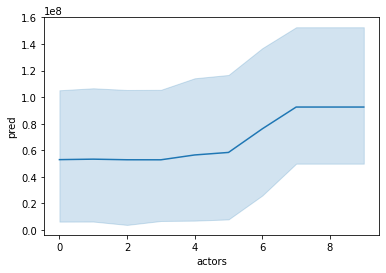

In [126]:
sns.lineplot(x='actors', y='pred', data=df_pdp.loc[df_pdp['indicator'] == 'actors'])

In [127]:
for x, y in enumerate(df_pdp.columns):
  if x == 0:
    df_temp = df_pdp.loc[df_pdp['indicator'] == y]
    df_app_pdp = df_temp.groupby(y).mean()
    df_app_pdp[y] = df_app_pdp.index
    df_app_pdp['indicator'] = y
  else:
    df_temp = df_pdp.loc[df_pdp['indicator'] == y]
    df_temp = df_temp.groupby(y).mean()
    df_temp['indicator'] = y
    df_temp[y] = df_temp.index
    df_app_pdp = pd.concat([df_app_pdp, df_temp], ignore_index=True)

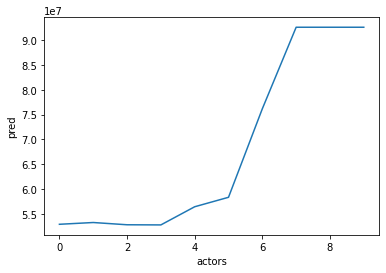

In [128]:
sns.lineplot(x = df_app_pdp.loc[df_app_pdp['indicator'] == 'actors', 'actors'], y = df_app_pdp.loc[df_app_pdp['indicator'] == 'actors', 'pred'], data=df_app_pdp)

In [129]:
df_app_pdp.loc[df_app_pdp['indicator'] == 'actors']

,budget,runtime,director,actors,year,month,day,number_of_languages,pred,Unnamed: 0,indicator,genres,original_language,production_countries,production_company
1610,4.028928e+07,101.0,0.5,0.0,2000.75,9.0,15.75,1.5,5.294083e+07,4981.75,actors,NaN,NaN,NaN,NaN
1611,4.028928e+07,101.0,0.5,1.0,2000.75,9.0,15.75,1.5,5.329676e+07,4981.75,actors,NaN,NaN,NaN,NaN
1612,4.028928e+07,101.0,0.5,2.0,2000.75,9.0,15.75,1.5,5.284430e+07,4981.75,actors,NaN,NaN,NaN,NaN
1613,4.028928e+07,101.0,0.5,3.0,2000.75,9.0,15.75,1.5,5.281377e+07,4981.75,actors,NaN,NaN,NaN,NaN
1614,4.028928e+07,101.0,0.5,4.0,2000.75,9.0,15.75,1.5,5.646525e+07,4981.75,actors,NaN,NaN,NaN,NaN
1615,4.028928e+07,101.0,0.5,5.0,2000.75,9.0,15.75,1.5,5.836553e+07,4981.75,actors,NaN,NaN,NaN,NaN
1616,4.028928e+07,101.0,0.5,6.0,2000.75,9.0,15.75,1.5,7.615995e+07,4981.75,actors,NaN,NaN,NaN,NaN
1617,4.028928e+07,101.0,0.5,7.0,2000.75,9.0,15.75,1.5,9.254614e+07,4981.75,actors,NaN,NaN,NaN,NaN
1618,4.028928e+07,101.0,0.5,8.0,2000.75,9.0,15.75,1.5,9.254614e+07,4981.75,actors,NaN,NaN,NaN,NaN
1619,4.028928e+07,101.0,0.5,9.0,2000.75,9.0,15.75,1.5,9.254614e+07,4981.75,actors,NaN,NaN,NaN,NaN


In [130]:
#final test to evaluate model
pipeline.score(X_test, y_test)

0.6065214980694571